##Predict the amount of medical insurance expenses based on several criteria (Age, ...), stored in a simple CSV File. The result could be used to adjust the premium amount 

The purpose is to analyse several informations of individual such as age, physical/family condition and location against their existing medical expense to be used for predicting future medical expenses of individuals that help medical insurance to make decision on charging the premium.

The method we will use to predict the amount of insurance charge is called a **Regression**.
Regression algorithm is one of the most common types of machine learning models. It refers to the estimation of a continuous dependent variable or response from a list of input variables, called *Features*. There are a variety of regression techniques, ranging from the simplest (linear regression) to more complex techniques including gradient boosting and neural networks. 


In this example, we will use 3 different algorithms: 
* Random forest 
* XGBoost 
* Neural Networks


###Acknowledgements:
The used *insurance.csv* file can be download from the Machine Learning course website prepared by Professor Eric Suess at http://www.sci.csueastbay.edu/~esuess/stat452/#week-8.

###Data Set

The dataset used here comes from a file named insurance.csv (see Acknowledgements section).
The first step is to download and rename it *predict_insurance_expenses.csv*.

The CSV file has the following columns:

In [0]:
cols = [ 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']

'expenses' is the amout of the medical insurance expenses that is currently paid for individual. It's considered as the *Label*. The rest are *Features*. Some of Features are considered as *Categorical*.(binary or short list of values)

In [0]:
categoricals = [ 'sex', 'smoker', 'region']

Upload the training file (***predict_insurance_expenses.csv***) into Google Drive


In [3]:
import pandas as pd
import numpy as np
import io

#from google.colab import drive
#drive.mount('/content/drive')
#%cd /content/drive/My Drive/Colab Notebooks/Data

from google.colab import files
uploaded = files.upload()

features = pd.read_csv(io.StringIO(uploaded['predict_insurance_expenses.csv'].decode('utf-8')), usecols = cols)
# Display the uploaded file
features

Saving predict_insurance_expenses.csv to predict_insurance_expenses.csv


age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
5      31  female  25.7         0     no  southeast   3756.62
6      46  female  33.4         1     no  southeast   8240.59
7      37  female  27.7         3     no  northwest   7281.51
8      37    male  29.8         2     no  northeast   6406.41
9      60  female  25.8         0     no  northwest  28923.14
10     25    male  26.2         0     no  northeast   2721.32
11     62  female  26.3         0    yes  southeast  27808.73
12     23    male  34.4         0     no  southwest   1826.84
13     56  female  39.8         0     no  southeast  11090.72
14     27    male  42.1         0    yes  southeast  39611.76
15     19    male  24.6         1     no  southwest   1837.24
16     52  female  30.8         1     no  northeast  10797.34
17     23    male  23.8         0     no  northeast   2395.17
18     56    male  40.3         0     no  southwest  10602.39
19     30    male  35.3         0    yes  southwest  36837.47
20     60  female  36.0         0     no  northeast  13228.85
21     30  female  32.4         1     no  southwest   4149.74
22     18    male  34.1         0     no  southeast   1137.01
23     34  female  31.9         1    yes  northeast  37701.88
24     37    male  28.0         2     no  northwest   6203.90
25     59  female  27.7         3     no  southeast  14001.13
26     63  female  23.1         0     no  northeast  14451.84
27     55  female  32.8         2     no  northwest  12268.63
28     23    male  17.4         1     no  northwest   2775.19
29     31    male  36.3         2    yes  southwest  38711.00
...   ...     ...   ...       ...    ...        ...       ...
1308   25  female  30.2         0    yes  southwest  33900.65
1309   41    male  32.2         2     no  southwest   6875.96
1310   42    male  26.3         1     no  northwest   6940.91
1311   33  female  26.7         0     no  northwest   4571.41
1312   34    male  42.9         1     no  southwest   4536.26
1313   19  female  34.7         2    yes  southwest  36397.58
1314   30  female  23.7         3    yes  northwest  18765.88
1315   18    male  28.3         1     no  northeast  11272.33
1316   19  female  20.6         0     no  southwest   1731.68
1317   18    male  53.1         0     no  southeast   1163.46
1318   35    male  39.7         4     no  northeast  19496.72
1319   39  female  26.3         2     no  northwest   7201.70
1320   31    male  31.1         3     no  northwest   5425.02
1321   62    male  26.7         0    yes  northeast  28101.33
1322   62    male  38.8         0     no  southeast  12981.35
1323   42  female  40.4         2    yes  southeast  43896.38
1324   31    male  25.9         1     no  northwest   4239.89
1325   61    male  33.5         0     no  northeast  13143.34
1326   42  female  32.9         0     no  northeast   7050.02
1327   51    male  30.0         1     no  southeast   9377.90
1328   23  female  24.2         2     no  northeast  22395.74
1329   52    male  38.6         2     no  southwest  10325.21
1330   57  female  25.7         2     no  southeast  12629.17
1331   23  female  33.4         0     no  southwest  10795.94
1332   52  female  44.7         3     no  southwest  11411.69
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]

###Code

In [0]:
# Import the algorithm models
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import ensemble 
from sklearn.metrics import mean_squared_error


Turn Categorical values into '0' and '1' values :

In [0]:
features2 = pd.get_dummies(features, columns = categoricals)

Isolate features from labels ('expense'):

In [0]:
labels = np.array(features['expenses'])
features = features2.drop('expenses', axis = 1)
feature_list = list(features.columns)
feature_list_no_facts = list(features.columns)

Split training and test set:

In [7]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.005, random_state = 42)
test_features.head(5)




age   bmi  children  ...  region_northwest  region_southeast  region_southwest
764    45  25.2         2  ...                 0                 0                 0
887    36  30.0         0  ...                 1                 0                 0
890    64  26.9         0  ...                 1                 0                 0
1293   46  25.7         3  ...                 1                 0                 0
259    19  31.9         0  ...                 1                 0                 0

[5 rows x 11 columns]

Explore the data:

In [8]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1331, 11)
Training Labels Shape: (1331,)
Testing Features Shape: (7, 11)
Testing Labels Shape: (7,)


###1. XGBoost Algorithm
XGBoost (eXtreme Gradient Boosting) is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm that attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models. XGBoost has done remarkably well in machine learning competitions because it robustly handles a variety of data types, relationships, and distributions, and the large number of hyperparameters that can be tweaked and tuned for improved fits. This flexibility makes XGBoost a solid choice for problems in regression, classification (binary and multiclass), and ranking.

Train and predict with the XGBoost (eXtreme Gradient Boosting) model. 

In [9]:
x = XGBRegressor(random_state = 44, n_jobs = 8, n_estimators = 100, max_depth=10, verbosity = 1)
x.fit(train_features, train_labels)
print('xgboost train score: ', x.score(train_features, train_labels))
xgb_predictions = x.predict(test_features)
print('xgboost test score: ', x.score(test_features, test_labels))
print('xgboost Predictions: ', xgb_predictions)


[15:16:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xgboost train score:  0.9971465650474812
xgboost test score:  0.9659851704449918
xgboost Predictions:  [ 9968.284   4985.4893 28600.223   9680.603  34864.098  10033.895
  1689.2646]


###2. Random Forest Regressor
Train and predict with Random Forest model

In [10]:
# Instantiate model with 200 decision trees
rf = RandomForestRegressor(bootstrap=False, n_estimators = 200, criterion='mse', verbose=False, random_state = np.random.RandomState(42), n_jobs = -1)
# Train the model on training data
rf.fit(train_features, train_labels);
print('Random Forest train score: ', rf.score(train_features, train_labels))
rf_predictions = rf.predict(test_features)
print('Random Forest test score: ', rf.score(test_features, test_labels))
print('Random Forest Predictions: ', rf_predictions)

Random Forest train score:  0.998660493218863
Random Forest test score:  0.9991004488375766
Random Forest Predictions:  [ 8604.48     5217.6468  28950.47     9388.61355 34262.7845   4762.33
  1708.0877 ]


###3. MLP Neural Network
Train and predict with MLP Regressor model. (Multi-layer Perceptron regressor)
The ‘lbfgs’ optimizer is used (quasi-Newton methods) and should give better results with small data sets.
6 neurons are used in the input layer.

In [11]:
nn = MLPRegressor(hidden_layer_sizes=(24,3,2), 
                  activation='relu', solver='lbfgs', max_iter = 1000, random_state = 56, verbose = False)
nn.fit(train_features, train_labels)
nn_predictions = nn.predict(test_features)
print('nn train score: ', nn.score(train_features, train_labels))
print('nn test score: ', nn.score(test_features, test_labels))
print('nn Predictions: ', nn_predictions)


nn train score:  0.8487085420392545
nn test score:  0.9613873723529001
nn Predictions:  [10655.10655585  5983.37518949 32713.28286854 10660.88544573
 29191.46238187  4795.9252029   1357.84783739]


###4. Plot comparison results for the 3 algorithms



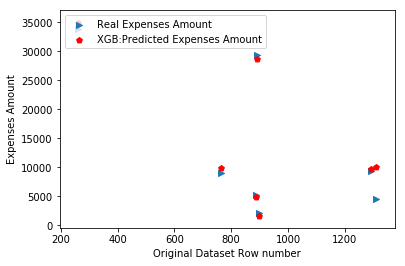

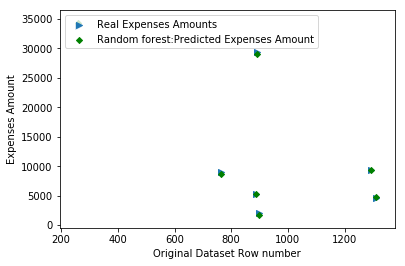

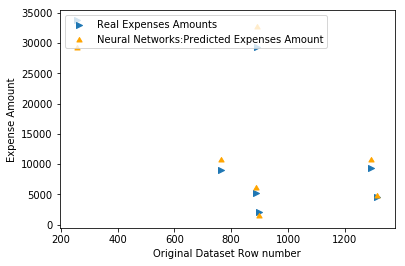

In [12]:
import matplotlib.pyplot as plt
import numpy as np

X = list(test_features.index) #Get the list of the row numbers 

# XGB graph
plt.scatter(X, test_labels, label="Real Expenses Amount", marker=">")
plt.scatter(X, xgb_predictions, color='red', label="XGB:Predicted Expenses Amount", marker=(5, 0))
plt.xlabel("Original Dataset Row number")
plt.ylabel("Expenses Amount")
plt.legend(loc='upper left')
plt.show()

# Random Forest graph
plt.scatter(X, test_labels, label="Real Expenses Amounts", marker=">")
plt.scatter(X, rf_predictions, color='green', label="Random forest:Predicted Expenses Amount", marker=(4, 0))
plt.xlabel("Original Dataset Row number")
plt.ylabel("Expenses Amount")
plt.legend(loc='upper left')
plt.show()

# NN graph
plt.scatter(X, test_labels, label="Real Expenses Amounts", marker=">")
plt.scatter(X, nn_predictions, color='orange', label="Neural Networks:Predicted Expenses Amount", marker=(3, 0))
plt.xlabel("Original Dataset Row number")
plt.ylabel("Expense Amount")
plt.legend(loc='upper left')
plt.show()